<a href="https://colab.research.google.com/github/AbiemwenseMaureenOshobugie/Cardiovascular-and-Covid-Data-Analysis/blob/main/cardio_covid_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 13 Data Analysis Questions

[Are **men more likely** to be a smoker than women?](#1)

[Do people over 50 have **higher cholesterol** levels than the rest?](#2)

[How much **heavier** is the age group with the highest average weight than the age group with the lowest weight?](#3)

[How tall are the **tallest 1% of people**](#4)

[Look at the **cumulative number** of confirmed cases in Italy between 2020-02-28 and 2020-03-20. Fit an exponential function (y = Ae^(Bx)) to this set to express cumulative cases as a function of days passed, by minimizing squared loss. What is the difference between the exponential curve and the total number of real cases on 2020-03-20?](#5)

[When did the **difference** in total number of confirmed cases between Italy and Germany become more than 10000?](#6)

[What is the **F1 score** of the following statement: Countries, where more than 20% of the population is over 65 years old, have death rates over 50 per million inhabitants. Ignore countries, where any of the neccessary information is missing!](#7)

[What is **the probability** that a country has GDP over $10000, if we known that they have at least 5 hospital beds per 1000 inhabitants?](#8)

[What percentage of the population **over 50 years old consume alcohol**? Ignore those persons, where we have no alcohol consumption information!](#9)

[What percentage of people are **more than 2 standard deviations** far from the average height?](#10)

[Which country has the **3rd highest death rate**? Death rate: total number of death per million inhabitants.](#11)

[Which of the following statements is true with **95% confidence**?](#12)

[Which **two features** have the highest spearman rank correlation?](#13)







## Feature and Variable Value Type

Age- age int (days)

Height- height int (cm)

Weight- weight float (kg)

Gender- gender categorical code

Systolic blood pressure- ap__hi int

Diastolic blood pressure- ap__lo int

Cholesterol- cholesterol 1: normal, 2: above normal, 3: well above normal

Glucose- gluc 1: normal, 2: above normal, 3: well above normal (*not present in this data*)

Smoking- smoke binary

Alcohol- alco binary 

Physical activity- active  (*not present in this data*)

Presence or absence of cardiovascular disease- cardio binary ___Target Variable (*not present in this data*)

*Systolic blood pressure is the maximum pressure in the arteries when the heart contracts and pumps blood. It is usually measured in millimeters of mercury (mmHg). A normal systolic blood pressure is typically in the range of 90-120 mmHg.*

*Diastolic blood pressure is the pressure in the arteries when the heart is resting between beats. It is measured in millimeters of mercury (mmHg). A normal diastolic blood pressure is usually between 60 and 90 mmHg. If your diastolic blood pressure is consistently above 90 mmHg, it is considered high and may increase your risk of developing cardiovascular disease.*

## Import Libraries

In [112]:
# to avoid unnecessary and irritating warning messages
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime
from scipy import optimize
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import spearmanr


## Cardio Alco Data

In [113]:
cardio_alco = pd.read_csv('/content/cardio_alco.csv')
cardio_alco.head()

,id;alco
0,44;0
1,45;0
2,46;0
3,47;0
4,49;0


In [114]:
print('\n',cardio_alco.shape,'\n')
cardio_alco.info()


 (56903, 1) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56903 entries, 0 to 56902
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id;alco  56903 non-null  object
dtypes: object(1)
memory usage: 444.7+ KB


In [115]:
# split the 'id;alco' column into two: 'id' and 'alco' columns
cardio_alco[["id", "alco"]] = cardio_alco["id;alco"].str.split(
    ";",
    expand=True,
)
# drop the 'id;alco' column from the dataframe
cardio_alco = cardio_alco.drop("id;alco", axis=1)
# change the data type fron object to int
cardio_alco = cardio_alco.astype({"id": "int", "alco": "int"})
# check the unique values in each column
print(f"\nNumber of unique id in the df are {cardio_alco.id.nunique()}")
print(
    f"\nThe range of the id is from {cardio_alco.id.min()} to {cardio_alco.id.max()}\n"
)
print(f"The unique alco values are {cardio_alco.alco.unique()}\n")
cardio_alco.head()  # a look at the data



Number of unique id in the df are 56903

The range of the id is from 44 to 99954

The unique alco values are [0 1]



,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0


In [116]:
cardio_alco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56903 entries, 0 to 56902
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      56903 non-null  int64
 1   alco    56903 non-null  int64
dtypes: int64(2)
memory usage: 889.2 KB


## Cardio Base Data

In [117]:
cardio_base = pd.read_csv('/content/cardio_base.csv')
cardio_base.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [118]:
cardio_base.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


In [119]:
print('\n',cardio_base.shape,'\n')
cardio_base.info()


 (70000, 9) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB


In [120]:
print(f"\nThere are {cardio_base.id.nunique()} unique id in the cardio_base data")
print(
    f"\nThe range of the id is from {cardio_base.id.min()} to {cardio_base.id.max()}\n"
)



There are 70000 unique id in the cardio_base data

The range of the id is from 0 to 99999



In [121]:
# convert the age from days to years by dividing values by 365
cardio_base["age"] = (cardio_base.age / 365).astype(int)
# convert height from cm to meters, by dividing values by 100.
cardio_base["height"] = round(cardio_base.height / 100, 2)
# mean arterial pressure(map) = DP + 1/3(SP – DP)
cardio_base["map"] = round(
    cardio_base["ap_lo"] + (cardio_base.ap_hi - cardio_base.ap_lo) / 3, 2
)
# the mean_bp is (DP + SP)/2
cardio_base["mean_bp"] = (cardio_base.ap_lo + cardio_base.ap_hi) / 2
# create a new column for the Body Mass Index (BMI), which is weight/height squared
cardio_base["bmi"] = round(cardio_base["weight"] / cardio_base["height"] ** 2, 1)


In [122]:
# define a function to classify patients into the classes of BMI
def bmi_class(weight, height):
    bmi = weight / (height**2)
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal weight"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

In [123]:
# apply the classify_bmi function to the dataframe
cardio_base["bmi_class"] = cardio_base.apply(
    lambda row: bmi_class(row["weight"], row["height"]), axis=1
)
cardio_base.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,map,mean_bp,bmi,bmi_class
0,0,50,2,1.68,62.0,110,80,1,0,90.00,95.0,22.0,Normal weight
1,1,55,1,1.56,85.0,140,90,3,0,106.67,115.0,34.9,Obese
2,2,51,1,1.65,64.0,130,70,3,0,90.00,100.0,23.5,Normal weight
3,3,48,2,1.69,82.0,150,100,1,0,116.67,125.0,28.7,Overweight
4,4,47,1,1.56,56.0,100,60,1,0,73.33,80.0,23.0,Normal weight


## Merge Cardio Alco and Cardio Base Data

In [124]:
# merge the cardio_alco and cardio_base data
cardio = pd.merge(
    cardio_alco,
    cardio_base,
    how="left",
    left_on=["id"],
    right_on=["id"],
)
print(cardio.shape)
cardio.head()


(56903, 14)


,id,alco,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,map,mean_bp,bmi,bmi_class
0,44,0,40,1,1.59,60.0,110,70,1,0,83.33,90.0,23.7,Normal weight
1,45,0,56,1,1.60,73.0,130,85,1,0,100.00,107.5,28.5,Overweight
2,46,0,60,2,1.73,82.0,140,90,3,0,106.67,115.0,27.4,Overweight
3,47,0,55,1,1.63,55.0,120,80,1,0,93.33,100.0,20.7,Normal weight
4,49,0,50,2,1.75,95.0,120,80,1,0,93.33,100.0,31.0,Obese


In [125]:
print(f'\nThere are {cardio_base.age.nunique()} unique ages\n')


There are 28 unique ages



What is the percentage of the Gender feature?

In [126]:
round((cardio_base.gender.value_counts()/len(cardio_base.gender))*100)

1    65.0
2    35.0
Name: gender, dtype: float64

What is the Average Height of the Gender feature?

In [127]:
cardio_base.groupby('gender')['height'].mean()


gender
1    1.613556
2    1.699479
Name: height, dtype: float64

There are usually more female than male in a survey, coupled with the average height of a female is less than that of a male. 

Therefore, the female is represented with 1 and the male with 2 in this survey.


In [128]:
# replace the values in the gender columns with 1: woman and 2: man
cardio['gender'] = cardio['gender'].replace([1, 2], ['woman', 'man'])

What is the distribution of the categorical variables in the data?

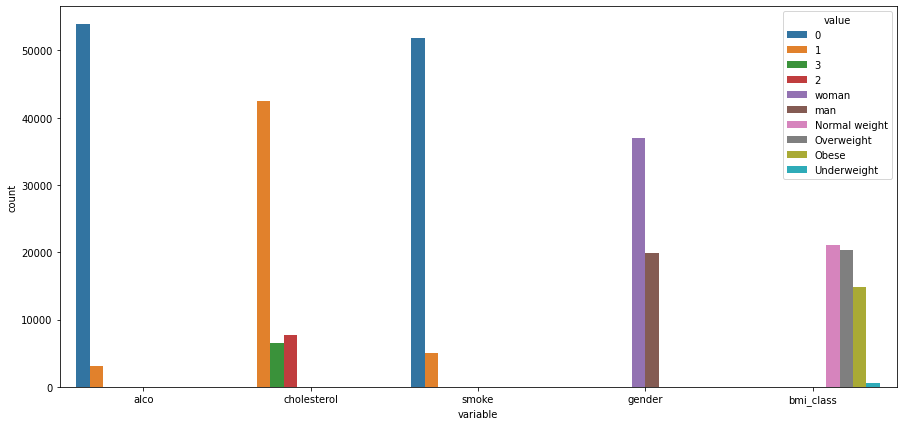

In [129]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 7))

cat_variables = cardio.loc[:,['alco', 'cholesterol', 'smoke', 'gender', 'bmi_class']]
sns.countplot(x="variable", hue="value",data= pd.melt(cat_variables));


The Numeric Variables

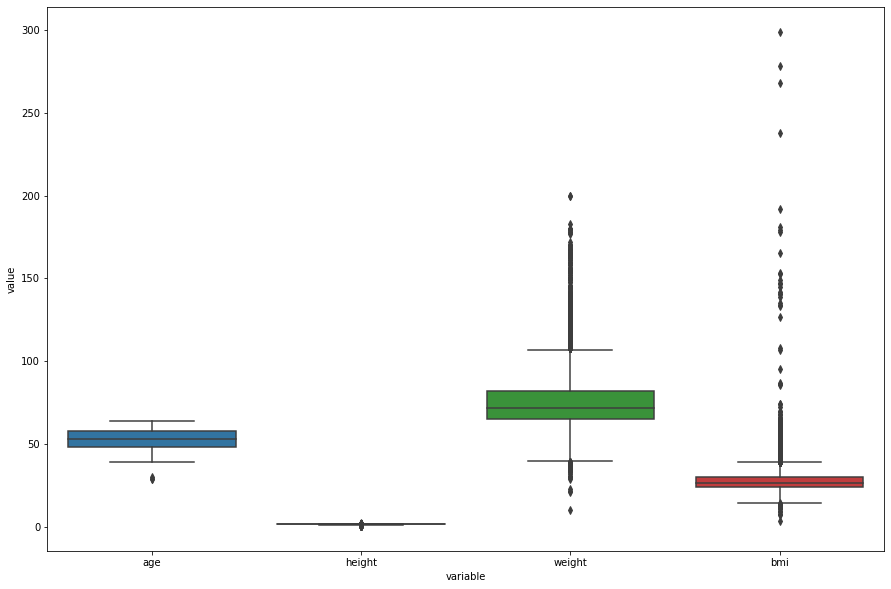

In [130]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 10))

num_variables1 = cardio.loc[:,['age', 'height', 'weight', 'bmi']]
sns.boxplot(x = 'variable',y = 'value',data = num_variables1.melt())


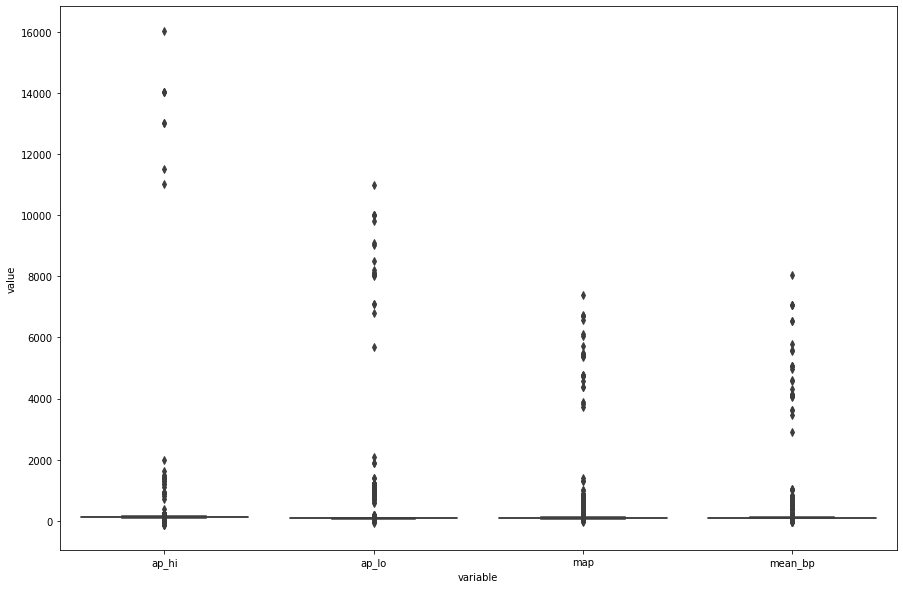

In [131]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 10))

num_variables2 = cardio.loc[:,['ap_hi', 'ap_lo', 'map', 'mean_bp']]
sns.boxplot(x = 'variable',y = 'value',data = num_variables2.melt())


## Civid Data

In [132]:
covid_data = pd.read_csv('/content/covid_data.csv')
covid_data.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


In [133]:
print('\n',covid_data.shape,'\n')
covid_data.info()


 (23082, 8) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23082 non-null  object 
 1   date                        23082 non-null  object 
 2   new_cases                   23082 non-null  int64  
 3   new_deaths                  23082 non-null  int64  
 4   population                  23018 non-null  float64
 5   aged_65_older_percent       20643 non-null  float64
 6   gdp_per_capita              20711 non-null  float64
 7   hospital_beds_per_thousand  19144 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


In [134]:
# created year, month and day columns from the date column
covid_data[["year", "month", "day"]] = covid_data["date"].str.split("-", expand = True)
# change the data type fron object to int
covid_data = covid_data.astype({"year":"int","month":"int","day":"int"})

# transform the date column of the data to datetime
covid_data["date"] = pd.to_datetime(covid_data["date"], errors="coerce")
# Using set_index() method on 'date' column
#covid_data = covid_data.set_index('date')
covid_data.head()



,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,year,month,day
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5,2019,12,31
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5,2020,1,1
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5,2020,1,2
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5,2020,1,3
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5,2020,1,4


In [135]:
print(
    f"\nThere are {covid_data.aged_65_older_percent.nunique()} unique aged 65 older percent\n"
)
print(
    f"There are {covid_data.hospital_beds_per_thousand.nunique()} unique hospital beds per thousand\n"
)
print(f"There are {covid_data.location.nunique()} unique locations\n")
print(f"The data covers {covid_data.year.nunique()} years\n")
print(f"The data covers {covid_data.month.nunique()} months of the years\n")



There are 183 unique aged 65 older percent

There are 100 unique hospital beds per thousand

There are 212 unique locations

The data covers 2 years

The data covers 7 months of the years



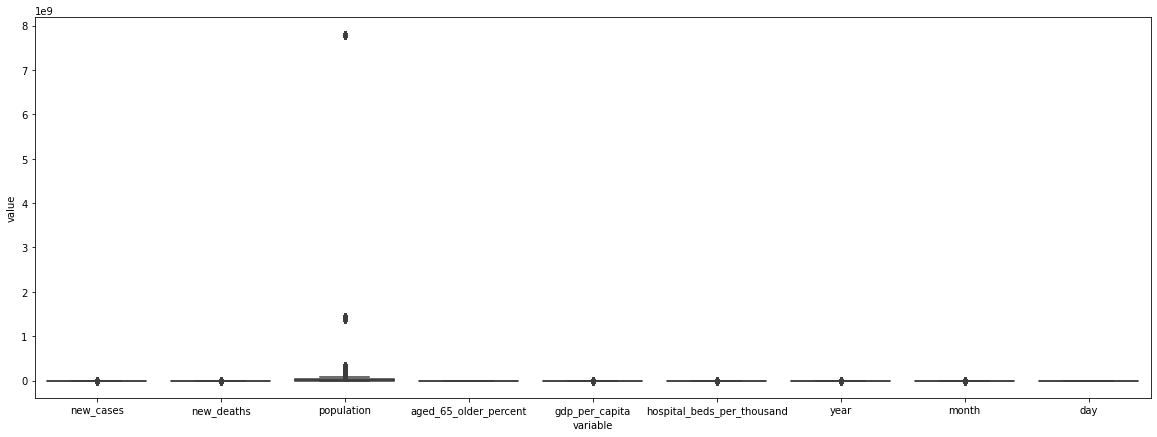

In [136]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 7))
covid_drop = covid_data.drop(["location", "date"], axis=1)
sns.boxplot(
    data=covid_drop.melt(),
    x="variable",
    y="value",
)


**The Test Questions Start From Here**

<a name="11"></a>

1. Which country has the 3rd highest death rate? Death rate: total number of death per million inhabitants.

In [137]:
# Calculate death rate for each country
covid_data["death_rate_per_million"] = covid_data["new_deaths"] / (
    covid_data["population"] / 1000000
)

death_rate_by_location = covid_data.groupby("location").agg(
    {"death_rate_per_million": "sum"}
)

# Sort countries by death rate in descending order
death_rate_by_location_sorted = death_rate_by_location.sort_values(
    "death_rate_per_million", ascending=False
)

# Select the 3rd element from the sorted list
third_highest_death_rate = death_rate_by_location_sorted.iloc[2].name

print(
    f"\nAnswer:  The country with the third highest death rate is {third_highest_death_rate}\n"
)



Answer:  The country with the third highest death rate is Andorra



<a name="1"></a>

2. Are men more likely to be a smoker than women?

The data contain information to identify gender IDs



In [138]:
num_smoker_by_gender = cardio.groupby("gender")["smoke"].mean()
ratio = round(
    num_smoker_by_gender[num_smoker_by_gender.index == "man"].item()
    / num_smoker_by_gender[num_smoker_by_gender.index == "woman"].item()
)
print(
    f"\nAnswer:  Men are {ratio}x more likely to be smokers than women\n"
)



Answer:  Men are 12x more likely to be smokers than women



<a name="13"></a>

3. Which two features have the highest spearman rank correlation?




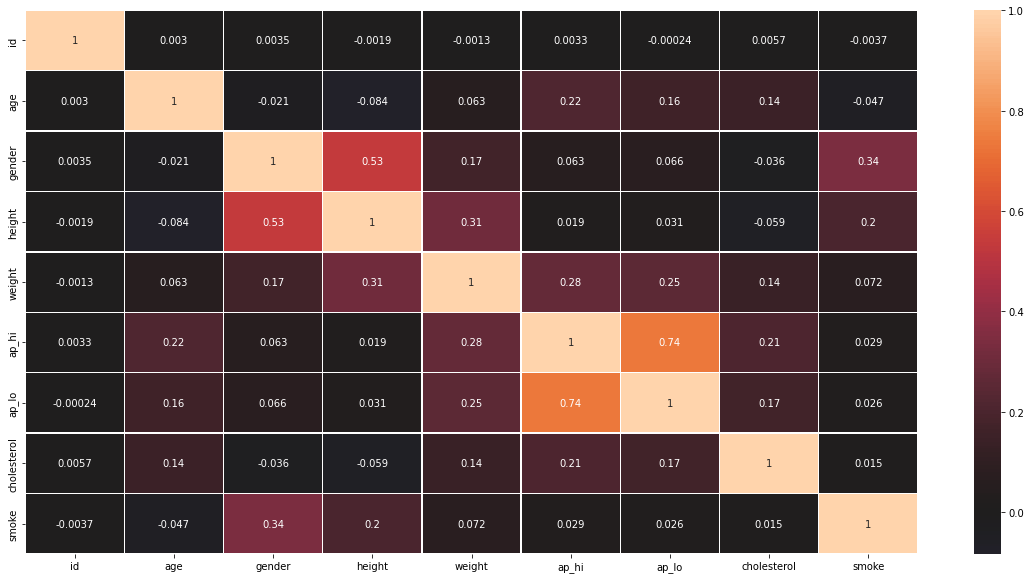

In [139]:
cardio_base_d = cardio_base.drop(['map','mean_bp','bmi','bmi_class'], axis = 1)
cardio_base_d['gender'] = cardio_base_d['gender'].replace(['woman', 'man'], [1, 2])
plt.figure(figsize=(20,10))
corr = cardio_base_d.corr(method = 'spearman')
sns.heatmap(corr, annot = True, center=0, linewidths=.5)
plt.show()

In [140]:
# Create an empty dictionary to store the correlation values
correlations = {}

# Iterate over all pairs of columns in the DataFrame
for col1 in cardio_base_d.columns:
    for col2 in cardio_base_d.columns:
        # Skip the comparison if the two columns are the same
        if col1 != col2:
            # Calculate the spearman rank correlation
            corr, _ = spearmanr(cardio_base_d[col1], cardio_base_d[col2])
            # Add the correlation value to the dictionary
            correlations[(col1, col2)] = corr
# Find the feature pair with the highest correlation
highest_corr = max(correlations, key=correlations.get)
highest_corr_value = correlations[highest_corr]

# Print out the feature pair and the correlation value
print(
    f"\nAnswer:  The highest correlation pair of features are {highest_corr} with correlation value of {round(highest_corr_value,2)}\n"
)



Answer:  The highest correlation pair of features are ('ap_hi', 'ap_lo') with correlation value of 0.74



<a name="10"></a>

4. What percentage of people are more than 2 standard deviations far from the
average height?



In [141]:
#  Calculate average and standard deviation of height
mean_height = cardio_base.height.mean()
std_height = cardio_base.height.std()
#  Filter DataFrame to include only rows where height is more than 2 standard deviations from the average
filtered_cardio_base = cardio_base[
    (cardio_base.height > mean_height + 2 * std_height)
    | (cardio_base.height < mean_height - 2 * std_height)
]
# Calculate percentage of rows in filtered DataFrame
print(
    f"\nAnswer:  {round(len(filtered_cardio_base) / len(cardio_base) * 100)}% of people are more than 2 standard deviations far from the average height\n"
)



Answer:  3% of people are more than 2 standard deviations far from the average height



<a name="9"></a>

5. What percentage of the population over 50 years old consume alcohol?

Also use thw cardio_alco.csv and merge the datasets on ID. Ignore those persons, where we have no alcohol consumption information!



In [142]:
# population over 50 years
cardio_over_50 = cardio[cardio.age > 50]
# cardio_over_50_df
print(
    f"\nAnswer:  {round(len(cardio_over_50[cardio_over_50.alco == 1]) / len(cardio_over_50) * 100)}% of the population over 50 years old consume alcohol\n"
)



Answer:  5% of the population over 50 years old consume alcohol



<a name="8"></a>

6. What is the probability that a country has GDP over $10000, if we known that they have at least 5 hospital beds per 1000 inhabitants?



In [143]:
# group data frame according to location
max_by_location = covid_data.groupby("location").max().dropna()

# Calculate the number of countries that have GDP over $10000 and at least 5 hospital beds per 1000 inhabitants
num_countries_meet_conditions = max_by_location[
    (max_by_location["gdp_per_capita"] > 10000)
    & (max_by_location["hospital_beds_per_thousand"] >= 5)
].shape[0]

# Calculate the number of countries that have at least 5 hospital beds per 1000 inhabitants
num_countries_with_5_beds = max_by_location[
    max_by_location["hospital_beds_per_thousand"] >= 5
].shape[0]

# Calculate the probability that a country has GDP over $10000 given that it has at least 5 hospital beds per 1000 inhabitants
print(
    f"\nAnswer:  The Probability that a country has GDP over $10,000, knowing that there are at least 5 hospital beds is {round((num_countries_meet_conditions / num_countries_with_5_beds)*100)}%\n"
)



Answer:  The Probability that a country has GDP over $10,000, knowing that there are at least 5 hospital beds is 88%



<a name="4"></a>

7. How tall are the tallest 1% of people





In [144]:
height = cardio_base['height'].quantile(0.99)
print(f'\nAnswer:  The tallest one percent of the people are over {round(height*100)}cm tall\n')



Answer:  The tallest one percent of the people are over 184cm tall



<a name="2"></a>

8. Do people over 50 have higher cholesterol levels than the rest?

In [145]:
"""
This code will give you the ratio of the average cholesterol levels for people over 50 
compared to the average cholesterol levels for people under 50. If the ratio is greater than 1, 
it means that people over 50 have higher average cholesterol levels. If the ratio is less than 1, 
it means that people under 50 have higher average cholesterol levels. If the ratio is equal to 1, 
it means that the average cholesterol levels are the same for both groups.
"""
avg_cholesterol_by_age = cardio_base.groupby("age")["cholesterol"].mean()
print(
    f"\nAnswer:  The ratio of the average cholesterol levels for people over 50 is {round(avg_cholesterol_by_age[avg_cholesterol_by_age.index > 50].mean() / avg_cholesterol_by_age[avg_cholesterol_by_age.index <= 50].mean(),3)} compared to the average cholesterol levels for people under 50\n"
)



Answer:  The ratio of the average cholesterol levels for people over 50 is 1.195 compared to the average cholesterol levels for people under 50



<a name="6"></a>

9. When did the difference in total number of confirmed cases between Italy and Germany become more than 10000?



In [146]:
# get the data frames for  germany and italy
germany = covid_data[covid_data.location == "Germany"]
italy = covid_data[covid_data.location == "Italy"]

#  create the cummulative sum of the new cases values
germany["cumulative_cases"] = germany.new_cases.cumsum()
italy["cumulative_cases"] = italy.new_cases.cumsum()

# take a subset of the dataframes containing only date and cummulative sum columns
germany_subset = germany[["date", "cumulative_cases"]]
italy_subset = italy[["date", "cumulative_cases"]]

# merge both dataframes
germ_it = pd.merge(
    germany_subset, italy_subset, how="left", left_on=["date"], right_on=["date"]
)

# find the absolute differences between their cummulative sums
germ_it["difference"] = abs(germ_it.cumulative_cases_x - germ_it.cumulative_cases_y)

# get the minimum date for a difference above 10000
when = germ_it[germ_it.difference > 10000]["date"].min().date()

print(
    f"\nAnswer:  The difference in total number of confirmed cases between Italy and Germany became more than 10,000 at {when}\n"
)



Answer:  The difference in total number of confirmed cases between Italy and Germany became more than 10,000 at 2020-03-12



<a name="12"></a>

10. Which of the following statements is true with 95% confidence?

> Smokers have higher blood presure than non-smokers

> Smokers have higher cholesterol level than non-smokers

> Smokers weigh less than non smokers

> Men have higher blood pressure than women















In [147]:
# Separate data into two groups: smokers and non-smokers
smokers = cardio[cardio['smoke'] == 1]
non_smokers = cardio[cardio['smoke'] == 0]

In [148]:
# Calculate mean blood pressure for each group
mean_bp_smokers = smokers["mean_bp"].mean()
mean_bp_non_smokers = non_smokers["mean_bp"].mean()

# Calculate standard deviation of blood pressure for each group
std_bp_smokers = smokers["mean_bp"].std()
std_bp_non_smokers = non_smokers["mean_bp"].std()

# Calculate standard error of the mean for each group
sem_bp_smokers = std_bp_smokers / np.sqrt(len(smokers))
sem_bp_non_smokers = std_bp_non_smokers / np.sqrt(len(non_smokers))

# Calculate t-value for difference in means using standard errors and sample sizes
t = (mean_bp_smokers - mean_bp_non_smokers) / np.sqrt(
    sem_bp_smokers**2 + sem_bp_non_smokers**2
)

# Calculate 95% confidence interval for difference in means using t-value and confidence level
confidence_interval = (mean_bp_smokers - mean_bp_non_smokers) + np.array(
    [-1.96, 1.96]
) * std_bp_smokers

# If confidence interval includes zero, conclude that there is not a 95% confidence that smokers have higher blood pressure than non-smokers
# If confidence interval does not include zero, conclude that there is a 95% confidence that smokers have higher blood pressure than non-smokers
if 0 in confidence_interval:
    print(
        "\nAnswer:  There is a 95% confidence that smokers have higher blood pressure than non-smokers.\n"
    )
else:
    print(
        "\nAnswer:  There is not a 95% confidence that smokers have higher blood pressure than non-smokers.\n"
    )



Answer:  There is not a 95% confidence that smokers have higher blood pressure than non-smokers.



In [149]:
# Calculate mean blood pressure for each group
cholesterol_smokers = smokers["cholesterol"].mean()
cholesterol_non_smokers = non_smokers["cholesterol"].mean()

# Calculate standard deviation of blood pressure for each group
std_cholesterol_smokers = smokers["cholesterol"].std()
std_cholesterol_non_smokers = non_smokers["cholesterol"].std()

# Calculate standard error of the mean for each group
sem_cholesterol_smokers = std_cholesterol_smokers / np.sqrt(len(smokers))
sem_cholesterol_non_smokers = std_cholesterol_non_smokers / np.sqrt(len(non_smokers))

# Calculate t-value for difference in means using standard errors and sample sizes
t = (cholesterol_smokers - cholesterol_non_smokers) / np.sqrt(
    sem_cholesterol_smokers**2 + sem_cholesterol_non_smokers**2
)

# Calculate 95% confidence interval for difference in means using t-value and confidence level
confidence_interval = (cholesterol_smokers - cholesterol_non_smokers) + np.array(
    [-1.96, 1.96]
) * std_cholesterol_smokers

# If confidence interval includes zero, conclude that there is not a 95% confidence that smokers cholesterol is higher than non-smokers
# If confidence interval does not include zero, conclude that there is a 95% confidence that smokers cholesterol is higher than non-smokers
if 0 in confidence_interval:
    print(
        "\nAnswer:  There is a 95% confidence that smokers have higher cholesterol than non-smokers.\n"
    )
else:
    print(
        "\nAnswer:  There is not a 95% confidence that smokers have higher cholesterol than non-smokers.\n"
    )



Answer:  There is not a 95% confidence that smokers have higher cholesterol than non-smokers.



In [150]:
# Calculate mean blood pressure for each group
weight_smokers = smokers["weight"].mean()
weight_non_smokers = non_smokers["weight"].mean()

# Calculate standard deviation of blood pressure for each group
std_weight_smokers = smokers["weight"].std()
std_weight_non_smokers = non_smokers["weight"].std()

# Calculate standard error of the mean for each group
sem_weight_smokers = std_weight_smokers / np.sqrt(len(smokers))
sem_weight_non_smokers = std_weight_non_smokers / np.sqrt(len(non_smokers))

# Calculate t-value for difference in means using standard errors and sample sizes
t = (weight_smokers - weight_non_smokers) / np.sqrt(
    sem_weight_smokers**2 + sem_weight_non_smokers**2
)


# Calculate 95% confidence interval for difference in means using t-value and confidence level
confidence_interval = (weight_smokers - weight_non_smokers) + np.array(
    [-1.96, 1.96]
) * sem_weight_smokers

# If confidence interval includes zero, conclude that there is not a 95% confidence that smokers weigh less than non-smokers
# If confidence interval does not include zero, conclude that there is a 95% confidence that smokers weigh less than non-smokers
if 0 in confidence_interval:
    print(
        "\nAnswer:  There is not a 95% confidence that smokers weigh less than non-smokers.\n"
    )
else:
    print(
        "\nAnswer:  There is a 95% confidence that smokers weigh less than non-smokers.\n"
    )



Answer:  There is a 95% confidence that smokers weigh less than non-smokers.



In [151]:
'''# Calculate mean blood pressure for each group
mean_bp_smokers = smokers["mean_bp"].mean()
mean_bp_non_smokers = non_smokers["mean_bp"].mean()

# Calculate standard deviation of blood pressure for each group
std_bp_smokers = smokers["mean_bp"].std()
std_bp_non_smokers = non_smokers["mean_bp"].std()

# Calculate standard error of the difference of means
sem_diff = np.sqrt(std_bp_smokers/len(smokers) + std_bp_non_smokers/len(non_smokers))

# Calculate z-score for difference in means using standard error of the difference of means
z = (mean_bp_smokers - mean_bp_non_smokers) / sem_diff

# Calculate 95% confidence interval for difference in means using t-value and confidence level
confidence_interval = (mean_bp_smokers - mean_bp_non_smokers) + np.array(
    [-1.96, 1.96]
) * std_bp_smokers

# If confidence interval includes zero, conclude that there is not a 95% confidence that smokers have higher blood pressure than non-smokers
# If confidence interval does not include zero, conclude that there is a 95% confidence that smokers have higher blood pressure than non-smokers
if z in confidence_interval:
    print(
        "\nAnswer:  There is a 95% confidence that smokers have higher blood pressure than non-smokers.\n"
    )
else:
    print(
        "\nAnswer:  There is not a 95% confidence that smokers have higher blood pressure than non-smokers.\n"
    )
'''

'# Calculate mean blood pressure for each group\nmean_bp_smokers = smokers["mean_bp"].mean()\nmean_bp_non_smokers = non_smokers["mean_bp"].mean()\n\n# Calculate standard deviation of blood pressure for each group\nstd_bp_smokers = smokers["mean_bp"].std()\nstd_bp_non_smokers = non_smokers["mean_bp"].std()\n\n# Calculate standard error of the difference of means\nsem_diff = np.sqrt(std_bp_smokers/len(smokers) + std_bp_non_smokers/len(non_smokers))\n\n# Calculate z-score for difference in means using standard error of the difference of means\nz = (mean_bp_smokers - mean_bp_non_smokers) / sem_diff\n\n# Calculate 95% confidence interval for difference in means using t-value and confidence level\nconfidence_interval = (mean_bp_smokers - mean_bp_non_smokers) + np.array(\n    [-1.96, 1.96]\n) * std_bp_smokers\n\n# If confidence interval includes zero, conclude that there is not a 95% confidence that smokers have higher blood pressure than non-smokers\n# If confidence interval does not include

In [152]:
# Separate data into two groups: men and women
men = cardio[cardio["gender"] == "man"]
women = cardio[cardio["gender"] == "woman"]

# Calculate mean blood pressure for each group
mean_bp_men = men["mean_bp"].mean()
mean_bp_women = women["mean_bp"].mean()

# Calculate standard deviation of blood pressure for each group
std_bp_men = men["mean_bp"].std()
std_bp_women = women["mean_bp"].std()

# Calculate standard error of the mean for each group
sem_bp_men = std_bp_men / np.sqrt(len(men))
sem_bp_women = std_bp_women / np.sqrt(len(women))

# Calculate t-value for difference in means using standard errors and sample sizes
t = (mean_bp_men - mean_bp_women) / np.sqrt(sem_bp_men**2 + sem_bp_women**2)

# Calculate 95% confidence interval for difference in means using t-value and confidence level
confidence_interval = (mean_bp_men - mean_bp_women) + np.array(
    [-1.96, 1.96]
) * sem_bp_men

# If confidence interval includes zero, conclude that there is not a 95% confidence that men have higher blood pressure than women
# If confidence interval does not include zero, conclude that there is a 95% confidence that men have higher blood pressure than women
if 0 in confidence_interval:
    print(
        "\nAnswer:  There is not a 95% confidence that men have higher blood pressure than women.\n"
    )
else:
    print(
        "\nAnswer:  There is a 95% confidence that men have higher blood pressure than women.\n"
    )



Answer:  There is a 95% confidence that men have higher blood pressure than women.



<a name="5"></a>

11. Look at the cumulative number of confirmed cases in Italy between 2020-02-28 and 2020-03-20. Fit an exponential function (y = Ae^(Bx)) to this set to express cumulative cases as a function of days passed, by minimizing squared loss. What is the difference between the exponential curve and the total number of real cases on 2020-03-20?



In [153]:
# take a subst of the italy dataframe from 2020-02-28 to 2020-03-20
italy_date_range = italy[(italy.date >= '2020-02-28') & (italy.date <= '2020-03-20')]

In [154]:
# Get the first date
first_date = italy_date_range["date"].iloc[0]
# Compute the difference between the first date and other dates using timedelta
italy_date_range["days_passed"] = (
    italy_date_range["date"].apply(lambda x: x - first_date).dt.days
)


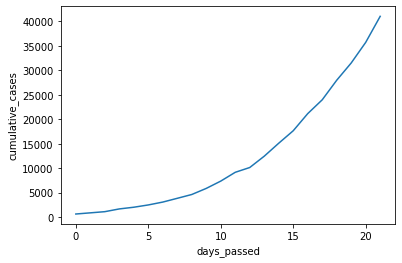

In [155]:
sns.lineplot(data=italy_date_range, x='days_passed', y='cumulative_cases')


In [156]:
x = italy_date_range["days_passed"] * 86400
y = italy_date_range["cumulative_cases"]

""" The below code is fitting a line to the data points represented by the arrays x and y.

The np.polyfit() function fits a polynomial of degree 1 (a line) to the data points by minimizing the squared error 
between the data points and the fitted polynomial. The function returns an array params containing the coefficients of the polynomial, 
in this case a line of the form y = mx + b. The coefficient m is the slope of the line, and b is the y-intercept, which are returned respectively. 
The fitted polynomial can be evaluated at any point x by plugging it into the equation y = mx + b using the coefficients in params.

In this case, the function np.log(y) is taking the natural logarithm of the values in the array y. 
This is often done when fitting a line to exponential data, as the natural logarithm of an exponential function is a linear function.
"""
params = np.polyfit(x, np.log(y), 1)
print(params)


[2.24520424e-06 6.80040490e+00]


In [157]:
# revert the polynomial to exponential
A = np.exp(params[1])
B = params[0]
print(A, B)
predicted_values = A * np.exp(B * x)

# Add predicted values to data frame
italy_date_range["predicted_cases"] = predicted_values.astype(int)


898.2109026485607 2.245204241243904e-06


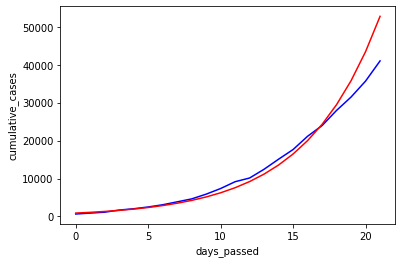

In [158]:
# Plot first line
sns.lineplot(x="days_passed", y="cumulative_cases", data=italy_date_range, color="blue")

# Plot second line
sns.lineplot(x="days_passed", y="predicted_cases", data=italy_date_range, color="red")


In [159]:
italy_on_2020_03_20 = italy_date_range.loc[
    italy_date_range["date"] == "2020-03-20"
].iloc[0]
print(italy_on_2020_03_20)
print(
    f"\n\nAnswer:  The difference between the exponential curve and the total number of real cases on 2020-03-20 is {italy_on_2020_03_20.predicted_cases - italy_on_2020_03_20.cumulative_cases}\n\n"
)


location                                    Italy
date                          2020-03-20 00:00:00
new_cases                                    5322
new_deaths                                    429
population                             60461828.0
aged_65_older_percent                      23.021
gdp_per_capita                          35220.084
hospital_beds_per_thousand                   3.18
year                                         2020
month                                           3
day                                            20
death_rate_per_million                   7.095386
cumulative_cases                            41035
days_passed                                    21
predicted_cases                             52791
Name: 10768, dtype: object


Answer:  The difference between the exponential curve and the total number of real cases on 2020-03-20 is 11756




<a name="3"></a>

12. How much heavier is the age group with the highest average weight than the age group with the lowest weight?





In [160]:
avg_weight_by_age = cardio_base.groupby("age")["weight"].mean()
print(
    f"\nAnswer:  The HIGHEST average weight is {round(((avg_weight_by_age.max() - avg_weight_by_age.min())/avg_weight_by_age.min())*100,1)}% heavier compared to the weight of the age group with the LOWEST average weight, \nor, the LOWEST average weight is {round(((avg_weight_by_age.max() - avg_weight_by_age.min())/avg_weight_by_age.max())*100,1)}% lighter compared to the weight of the age group with the HIGHEST average weight.\n"
)



Answer:  The HIGHEST average weight is 28.6% heavier compared to the weight of the age group with the LOWEST average weight, 
or, the LOWEST average weight is 22.2% lighter compared to the weight of the age group with the HIGHEST average weight.



<a name="7"></a>

13. **What is the F1 score of the following statement**:

 Countries, where more than 20% of the population is over 65 years old, have death rates over 50 per million inhabitants. 
 
 Ignore countries, where any of the neccessary information is missing!



In [161]:
# Filter data frame to include only countries where the necessary information is available
over_65yr_20_percent = covid_data[
    covid_data["aged_65_older_percent"].notnull()
    & covid_data["death_rate_per_million"].notnull()
]

# group the dataframe according to a location
sum_by_location = over_65yr_20_percent.groupby("location").agg(
    {
        "population": "mean",
        "aged_65_older_percent": "max",
        "death_rate_per_million": "sum",
    }
)

# Filter data frame to include only countries where more than 20% of the population is over 65 years old
country_aged_65_over_20_percent = sum_by_location[
    sum_by_location["aged_65_older_percent"] > 20
]

# Filter data frame to include only countries where the death rate is over 50 per million inhabitants
country_aged_65_over_20_percent_death_rate_over_50_per_million = (
    country_aged_65_over_20_percent[
        country_aged_65_over_20_percent["death_rate_per_million"] > 50
    ]
)

# Precision is the proportion of true positive results among all positive results (true positive + false positive). ie
# the number of true positive cases (countries where more than 20% of the population is over 65 years old and
# the death rate is over 50 per million inhabitants) divided by the total number of positive cases predicted by the statement
# (countries where more than 20% of the population is over 65 years old).


# Recall is the proportion of true positive results among all actual positive results (true positive + false negative). ie
# the number of true positive cases (countries where more than 20% of the population is over 65 years old and
# the death rate is over 50 per million inhabitants) divided by the total number of actual positive cases
# (countries where the death rate is over 50 per million inhabitants).


true_positive = total_actual_positive = len(
    country_aged_65_over_20_percent_death_rate_over_50_per_million
)
total_positive = len(country_aged_65_over_20_percent)

precision = true_positive / total_positive
recall = true_positive / total_actual_positive

print(
    "\nAnswer:  The F1 score of Countries where more than 20% of the population is over 65 years old, have death rates over 50 per million inhabitants is ",
    round(2 * (precision * recall) / (precision + recall), 2),
    "\n",
)



Answer:  The F1 score of Countries where more than 20% of the population is over 65 years old, have death rates over 50 per million inhabitants is  0.73 

